In [20]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

In [21]:
user = pd.read_csv('user_table.csv')
user

,user_id,signup_date
0,34,2015-01-01
1,59,2015-01-01
2,178,2015-01-01
3,285,2015-01-01
4,383,2015-01-01
...,...,...
99995,8999327,2015-08-31
99996,8999539,2015-08-31
99997,8999550,2015-08-31
99998,8999709,2015-08-31


In [22]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   signup_date  100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [23]:
test = pd.read_csv('test_table.csv')
test

,user_id,date,browser,test,pages_visited
0,600597,2015-08-13,IE,0,2
1,4410028,2015-08-26,Chrome,1,5
2,6004777,2015-08-17,Chrome,0,8
3,5990330,2015-08-27,Safari,0,8
4,3622310,2015-08-07,Firefox,0,1
...,...,...,...,...,...
99995,2698493,2015-08-21,Chrome,1,6
99996,3396864,2015-08-04,Chrome,0,5
99997,7507573,2015-08-06,IE,1,9
99998,2316634,2015-08-17,IE,1,7


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        100000 non-null  int64 
 1   date           100000 non-null  object
 2   browser        100000 non-null  object
 3   test           100000 non-null  int64 
 4   pages_visited  100000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.8+ MB


In [38]:
df = pd.merge(left=user, right=test, on='user_id', how='left')
df

,user_id,signup_date,date,browser,test,pages_visited
0,34,2015-01-01,2015-08-15,Chrome,0,6
1,59,2015-01-01,2015-08-12,Chrome,1,6
2,178,2015-01-01,2015-08-10,Safari,1,3
3,285,2015-01-01,2015-08-03,Opera,0,5
4,383,2015-01-01,2015-08-05,Firefox,1,9
...,...,...,...,...,...,...
99995,8999327,2015-08-31,2015-08-31,Safari,0,3
99996,8999539,2015-08-31,2015-08-31,IE,1,2
99997,8999550,2015-08-31,2015-08-31,IE,0,7
99998,8999709,2015-08-31,2015-08-31,Chrome,1,4


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        100000 non-null  int64 
 1   signup_date    100000 non-null  object
 2   date           100000 non-null  object
 3   browser        100000 non-null  object
 4   test           100000 non-null  int64 
 5   pages_visited  100000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.3+ MB


In [27]:
#measure success
df.groupby('test')['pages_visited'].mean()

test
0    4.608394
1    4.599693
Name: pages_visited, dtype: float64

<AxesSubplot:xlabel='test', ylabel='pages_visited'>

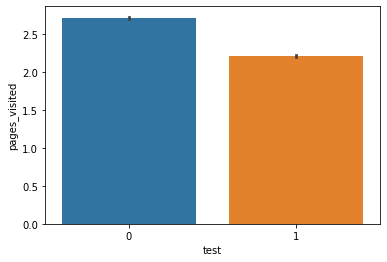

In [28]:
sns.barplot(x='test', y='pages_visited', data=df, estimator = np.std)

In [29]:
#t-test
control_page = df[df['test'] == 0]['pages_visited'].values
experiment_page = df[df['test'] == 1]['pages_visited'].values

print('T-test:\t', ttest_ind(a=control_page, b=experiment_page, equal_var=False))

T-test:	 Ttest_indResult(statistic=0.5571118435554797, pvalue=0.5774523171559118)


In [ ]:
#pvalue is 0.57, which is much higher than 0.05
#we cannot reject the null hypothesis that there is no difference between control and experiment group
#according to the test result, this shouldn't apply to all users

Text(0.5, 1.0, 'Browsers')

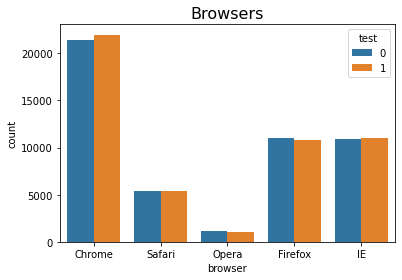

In [79]:
# visualization of browser
sns.countplot(x='browser', hue='test', data=df).set_title('Browsers', fontsize=16)

Text(0.5, 1.0, 'Visiters and Browsers')

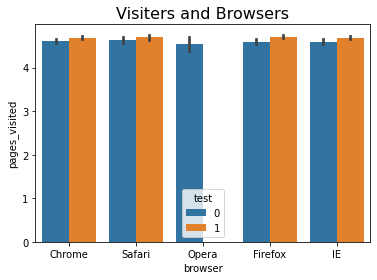

In [77]:
sns.barplot(x='browser', y='pages_visited', hue='test', data=df).set_title('Visiters and Browsers', fontsize=16)

In [83]:
sub = df[df['browser'] != 'Chrome']
sub.groupby('test')['pages_visited'].mean()

test
0    4.604656
1    4.528744
Name: pages_visited, dtype: float64

<AxesSubplot:xlabel='test', ylabel='pages_visited'>

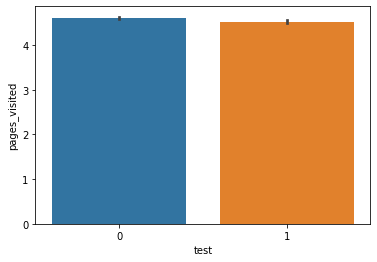

In [85]:
sns.barplot(x='test', y='pages_visited', data=sub)

In [87]:
ctr_page = sub[sub['test'] == 0]['pages_visited'].values
exp_page = sub[sub['test'] == 1]['pages_visited'].values

print('T-test:\t', ttest_ind(a=control_page, b=experiment_page, equal_var=False))

T-test:	 Ttest_indResult(statistic=3.620009008966688, pvalue=0.00029485760400926804)
